# Overview
In this lecture we will learn about different methods for visualizing data, and the exploratory data analysis (EDA) that you can do purely with visual techniques. Some specific topics we will cover:
- Basic plotting with matplotlib and seaborn: scatter plots, histograms, box plots, time series
- Exploratory Data Analysis
- Parameter settings & $\LaTeX$ rendering for publication-quality plots
- Multi-panel plots
- 2D heatmaps
- 3D surface plots
- Saving videos

# The Basics

## Scatter plots
One of the most common plots you will make as a data scientist is a scatter plot, which helps you determine whether two variables are related to each other. In other words: as the value of one variable increases, does the value of the other variable also increase? Or does it decrease? Or remain approximately constant? We can generate some random data to explore this technique:

In [41]:
import numpy as np
import matplotlib.pyplot as plt  # Matplotlib is the standard plotting package, and this is the standard way to import it 

In [42]:
x = np.linspace(-10, 10, 100)  # 100 values linearly spaced between -10 and 10

In [43]:
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [44]:
noise = np.random.randn(len(x)) * 2

In [45]:
y = 1.5 * x + noise

We have now defined two arrays, `x` and `y` that are the same size (100 elements each). We can create an x vs y scatter plot like so:

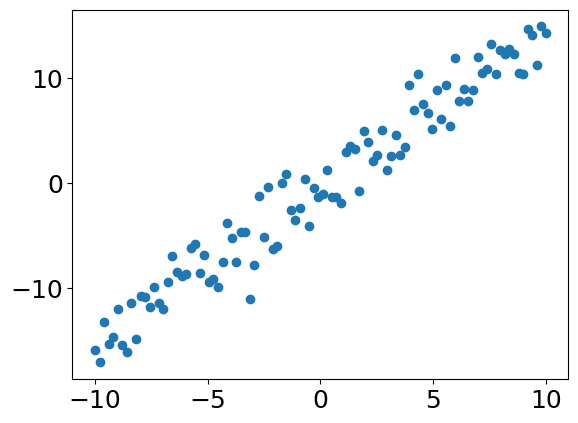

In [46]:
plt.plot(x, y, 'o')

Or equivalently:

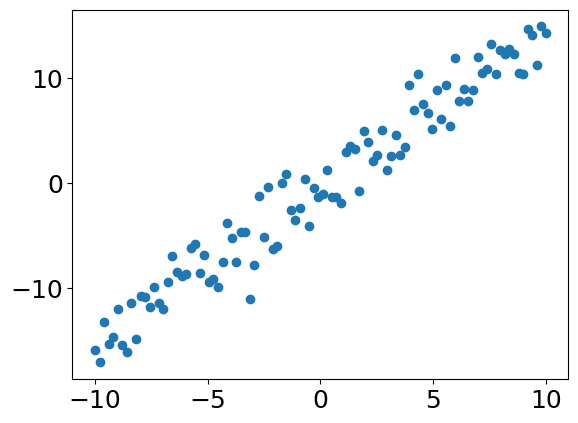

In [47]:
plt.scatter(x, y)

But if you turned in a plot like this for your homework, you would lose many points. Let's add some key elements, like labels. This would be the bare minimum required for an acceptable plot; we'll learn later about ways to make publication-quality graphics in matplotlib. 

Text(0.5, 1.0, 'Example Scatter Plot')

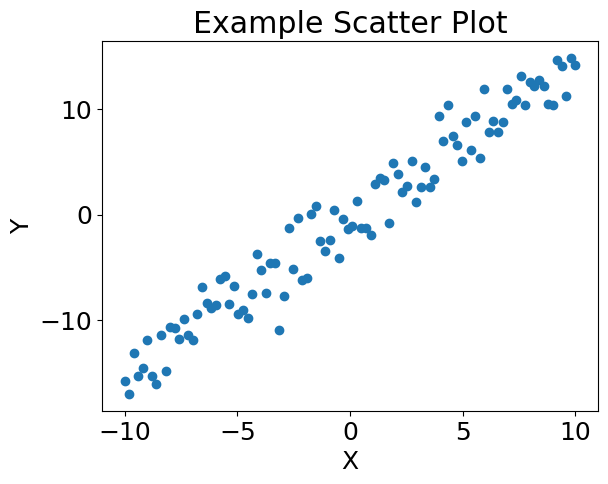

In [48]:
plt.plot(x, y, 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example Scatter Plot")

Seems pretty clear that `x` and `y` are positively correlated to each other. But what about `x` and `noise`?

Text(0.5, 1.0, 'Example Scatter Plot')

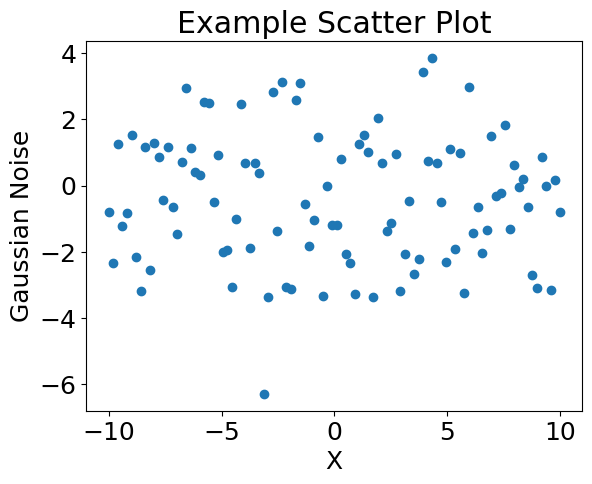

In [49]:
plt.plot(x, noise, 'o')
plt.xlabel("X")
plt.ylabel("Gaussian Noise")
plt.title("Example Scatter Plot")

Not so much, and no statistics needed: we can see visually that the two variables don't have a relationship to each other. 

## Histograms
Sometimes we only have one variable to look at rather than two variables to compare to each other. In this case, a histogram is a good visualization tool. As a reminder: histograms split your variable up into intervals/ranges/bins of values, and then count how many values fall into each bin. The bins will be on the x-axis, and the counts will be on the y-axis.  

Text(0, 0.5, 'Counts')

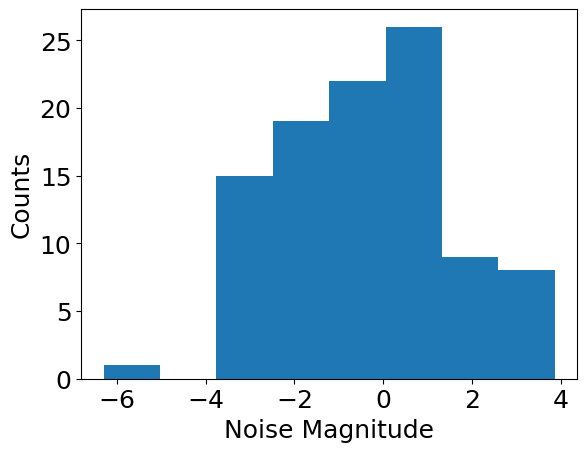

In [50]:
plt.hist(noise, bins="auto")
plt.xlabel("Noise Magnitude")
plt.ylabel("Counts")

Here, we used the optional argument `bins="auto"` to tell matplotlib to automatically determine how many bins to use. We can manually specify this with an integer if we want:

Text(0, 0.5, 'Counts')

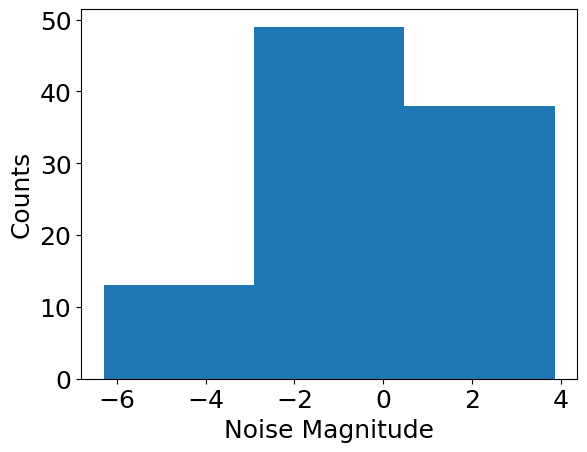

In [51]:
plt.hist(noise, bins=3)
plt.xlabel("Noise Magnitude")
plt.ylabel("Counts")

Or provide a range, which sets the boundary of each bin:

Text(0, 0.5, 'Counts')

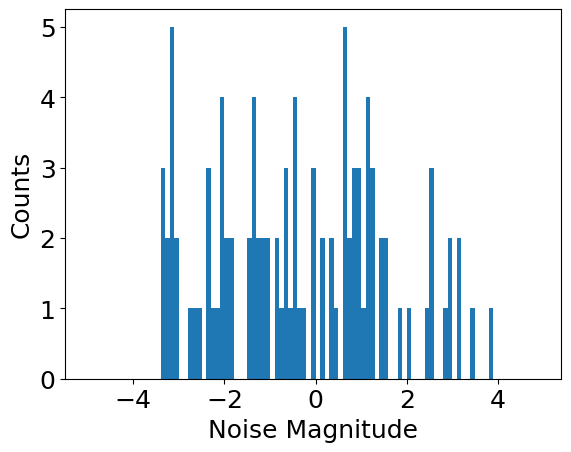

In [52]:
plt.hist(noise, bins=np.arange(-5, 5, 0.1))
plt.xlabel("Noise Magnitude")
plt.ylabel("Counts")

As you can see, the histogram will look very different depending on how you bin it. A good histogram will give an accurate sense of the *distribution* of the data, e.g., unimodal vs bimodal, skewed vs symmetric. If you use too many bins, then most of the counts will be around 1. If you use too few bins, you'll just get a couple big bars. Something in between is what you want, and it can be more of an art than a science.

One more note about histograms: instead of having counts on the y-axis, we often have *density*, which is a way to normalize the histogram bar heights such that the area of all the bars (i.e., the area under the curve) sums to 1. This is helpful because it means that the probability of finding a sampling a certain range of values can be estimated as the area under the curve between those values. 

Text(0, 0.5, 'Density')

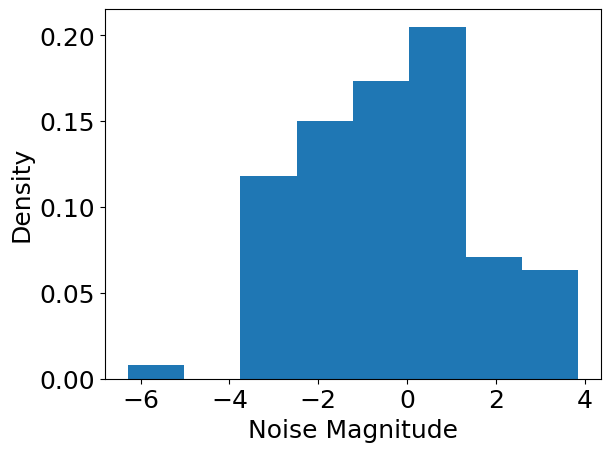

In [53]:
plt.hist(noise, bins="auto", density=True)
plt.xlabel("Noise Magnitude")
plt.ylabel("Density")

## Box plots
If you want to compare the distributions of multiple variables to each other, one way to do it would be to make multiple histograms and stack them on top of each other. This can get a little messy though, so it is more common to rely on Box Plots. Let's see how they work with the Iris dataset and a new plotting package, Seaborn.

In [54]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

<Axes: xlabel='sepal_length'>

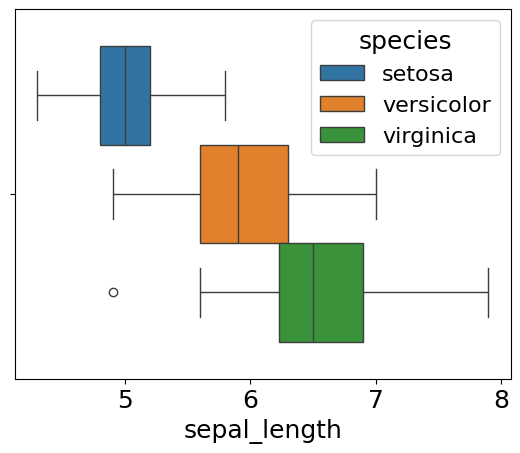

In [55]:
sns.boxplot(data=df, x="sepal_length", hue="species")

Here, we told seaborn to plot data contained in the dataframe `df`. We wanted the `sepal_length` column, and we wanted a separate box plot for each unique value of `species`, denoted by the `hue` argument. 

But what is the box plot actually showing? Let's discuss the components of the diagram below

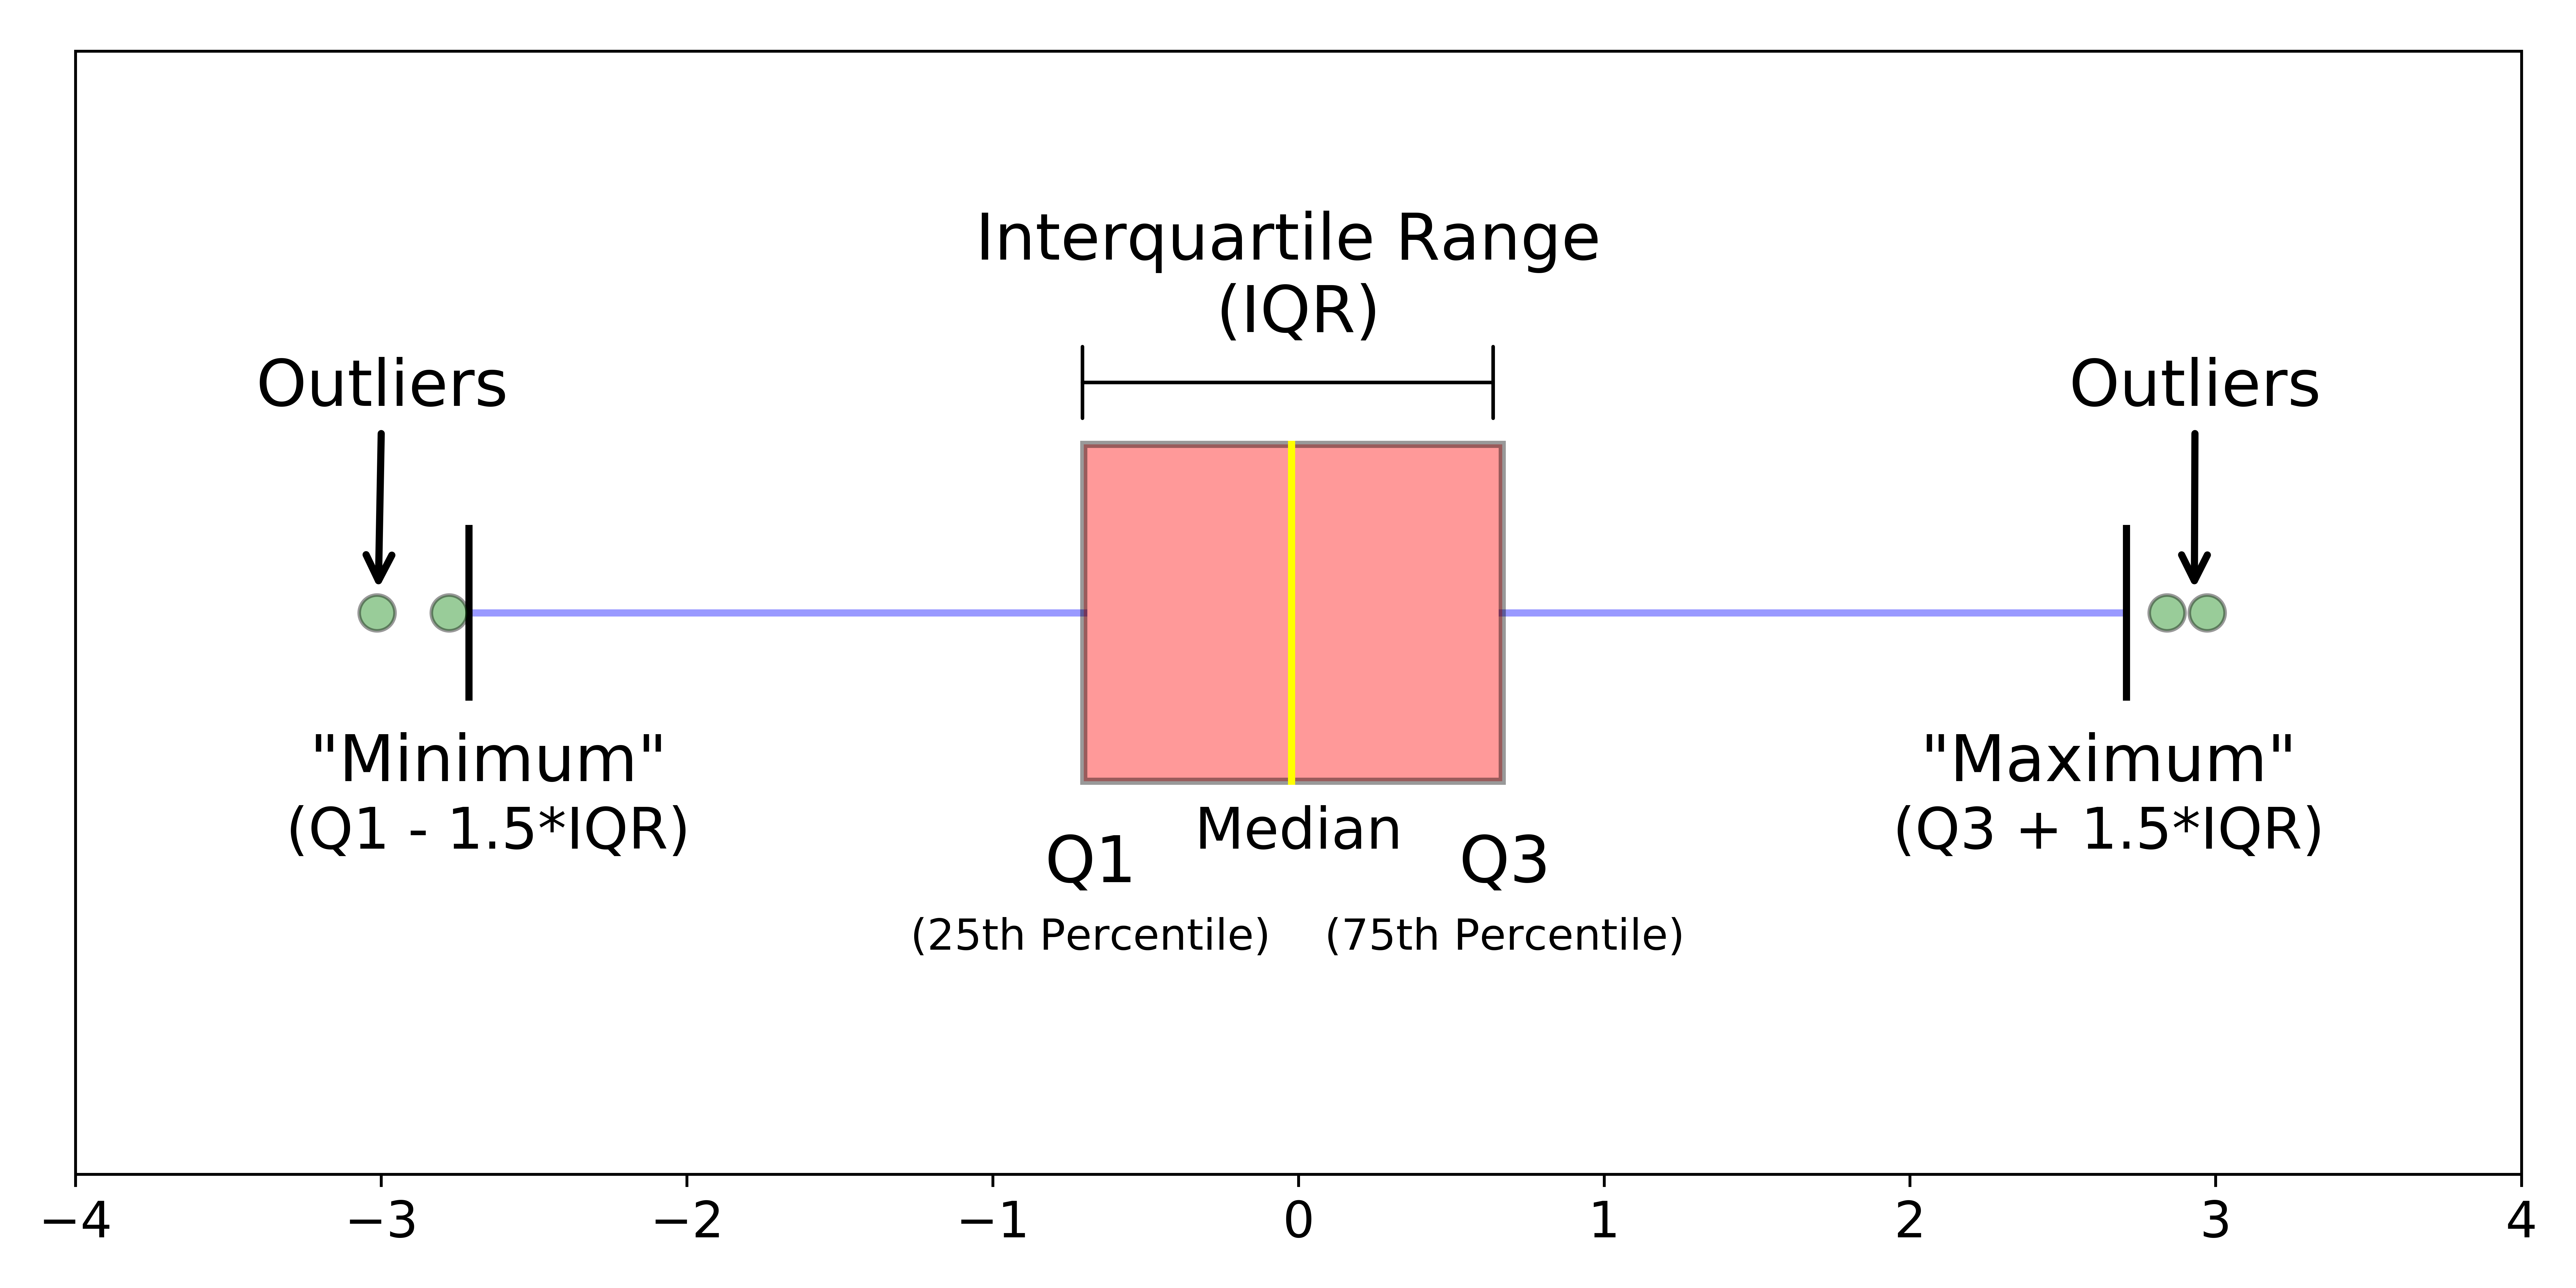

In [56]:
from IPython.display import Image
Image("boxplot.png")

## Quick Breakout: Seaborn for Scatter Plots
Use Seaborn to make scatter plots of some of the different variables in the Iris dataset. Which variables are correlated to each other? How do these correlations change when your scatter plots are separated by species?

## Time series data
So far we haven't seen any data with a temporal (time) component. Any dataset where the sampling time is relevant is called time series data. This requires special handling in Python, as we will demonstrate with a sample air quality dataset. 

In [57]:
df = pd.read_csv("air_quality_no2_long.csv")

In [58]:
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [59]:
df = df.loc[df["city"] == "Paris"]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1004 non-null   object 
 1   country    1004 non-null   object 
 2   date.utc   1004 non-null   object 
 3   location   1004 non-null   object 
 4   parameter  1004 non-null   object 
 5   value      1004 non-null   float64
 6   unit       1004 non-null   object 
dtypes: float64(1), object(6)
memory usage: 62.8+ KB


Let's say we want to plot the time (given by `date.utc`) vs the NO2 value (given by `value`). If we try to work with the data as it is read in, we run into trouble because the dates are interpreted as strings:

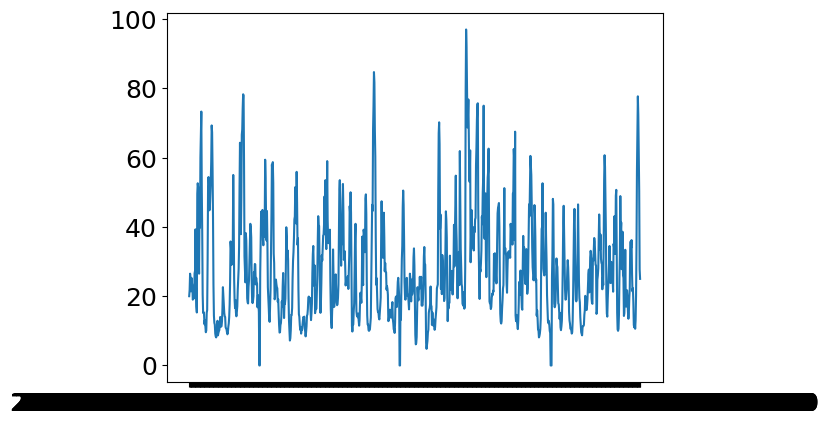

In [61]:
plt.plot(df["date.utc"], df["value"])

We will almost always need to convert times into a pandas Datetime type before working with them:

In [62]:
df["date.utc"] = pd.to_datetime(df["date.utc"])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       1004 non-null   object             
 1   country    1004 non-null   object             
 2   date.utc   1004 non-null   datetime64[ns, UTC]
 3   location   1004 non-null   object             
 4   parameter  1004 non-null   object             
 5   value      1004 non-null   float64            
 6   unit       1004 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 62.8+ KB


Trying again:

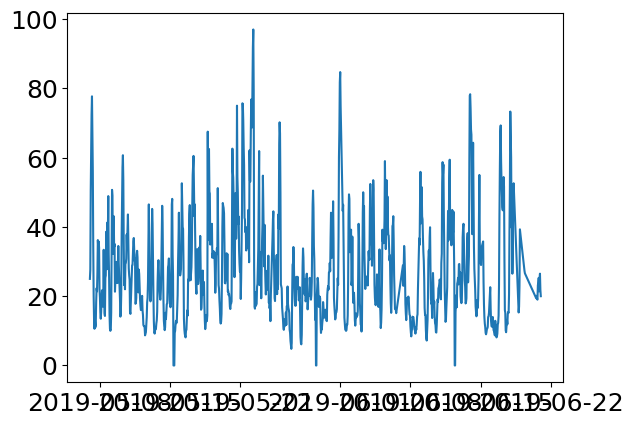

In [64]:
plt.plot(df["date.utc"], df["value"])

A little better, but still not great. Let's mess with some options:

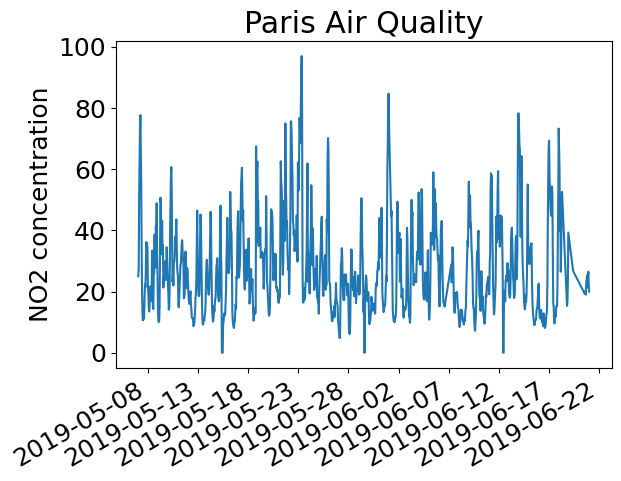

In [65]:
fig = plt.figure()  # Initialize a figure object
plt.plot(df["date.utc"], df["value"])  # Make the plot
plt.xticks(pd.date_range(start="2019-05-08", end="2019-06-22", freq="5D"))  # Set the x-axis tick positions
plt.ylabel("NO2 concentration")
plt.title("Paris Air Quality")
fig.autofmt_xdate()  # Rotates and offsets the x-axis labels

# More Advanced Plotting
The techniques above will give you a lot of mileage for exploratory data analysis, but for professional purposes you will want to give your plots a bit more pizzazz. Let's start by making plots look better. 

## Plot params
We can improve a simple plot dramatically by modifying the default parameters that matplotlib uses. Most of these are just related to the font style and size. By default it is hard to read the labels on a matplotlib plot unless it is on a computer screen in front of you. Remember that your audience may be squinting at the screen from across the room, and they need to be able to read your graphics. 

In [66]:
params = {
    "axes.labelsize": 18, 
    "font.size": 18,
    "legend.fontsize": 16,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": True,
    "font.family": "serif",
}
plt.rcParams.update(params)

In [67]:
import matplotlib.dates as mdate  # Package for formatting dates

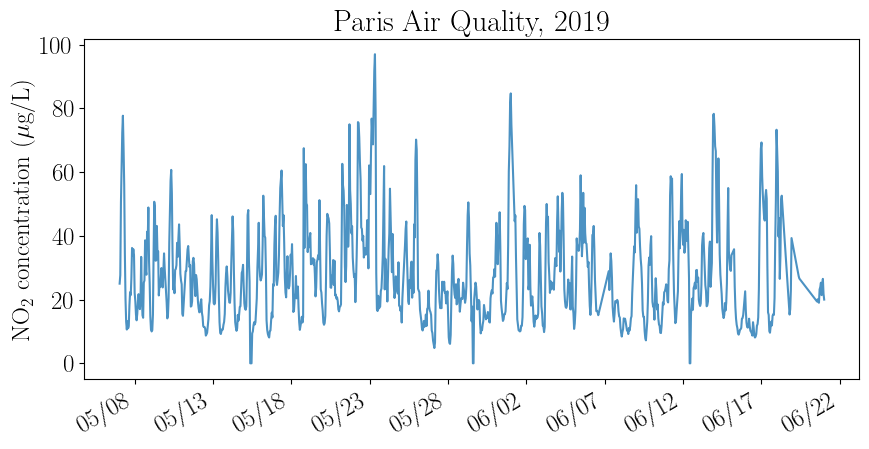

In [68]:
fig, ax = plt.subplots()  # object-oriented figure initialization gives us more control over the options
ax.plot(df["date.utc"], df["value"], linewidth=1.5, alpha=0.8)  # Slightly thicker line with a bit of transparency
ax.set_xticks(pd.date_range(start="2019-05-08", end="2019-06-22", freq="5D"))
ax.set_ylabel(r"NO$_2$ concentration ($\mu$g/L)")  # Format labels with LaTeX
ax.set_title("Paris Air Quality, 2019")
ax.xaxis.set_major_formatter(mdate.DateFormatter("%m/%d"))  # Custom x-tick label format
fig.autofmt_xdate()
fig.set_size_inches(10, 5)  # Optimal size will depend on the plot, but with time series you often want something pretty wide

## Multi-panel plots
What if we want multiple subplots in a single figure? Matplotlib makes this easy. But I'm going to turn off TeX rendering because it's slow

In [70]:
params = {
    "axes.labelsize": 18,
    "font.size": 18,
    "legend.fontsize": 16,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": False,
    "font.family": "sans-serif",  # sans-serif is usually cleaner looking if you aren't rendering equations with TeX
}
plt.rcParams.update(params)

In [71]:
df_full = pd.read_csv("air_quality_no2_long.csv")
df_full["date.utc"] = pd.to_datetime(df_full["date.utc"])
cities = df_full["city"].unique()

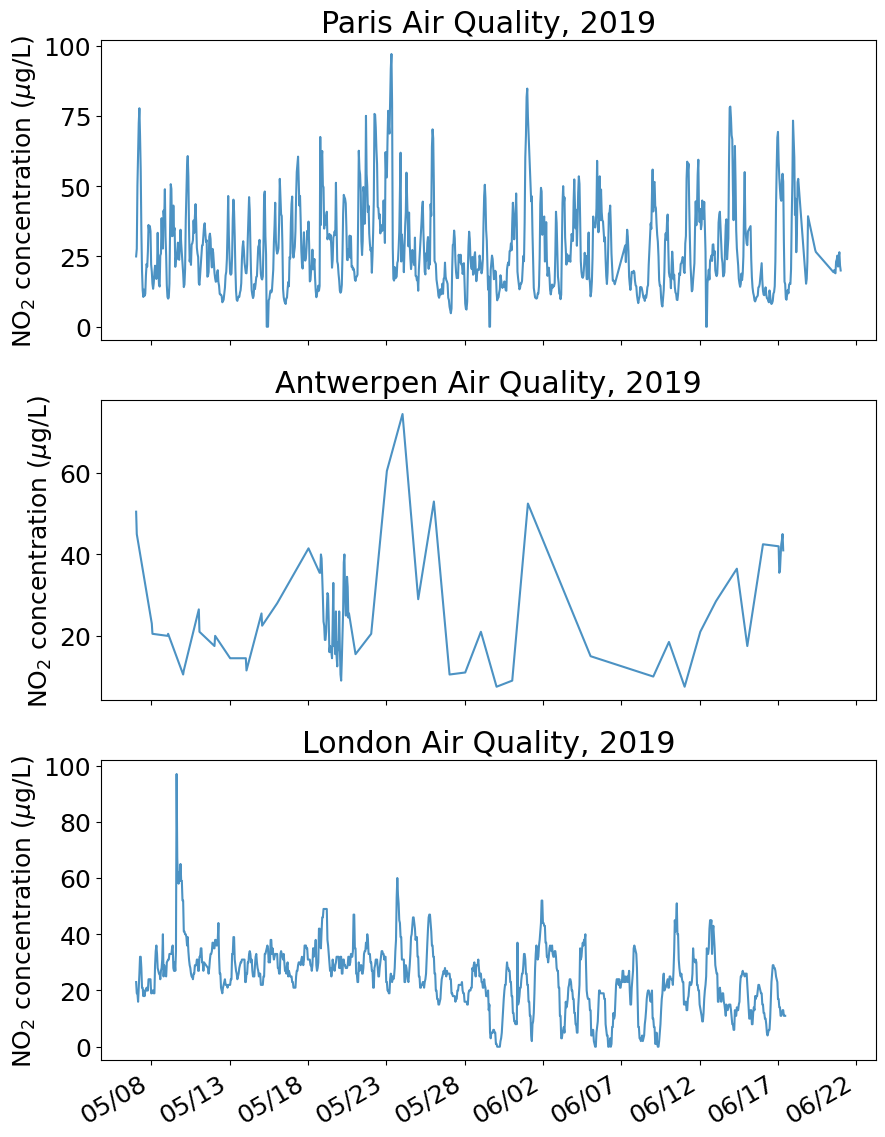

In [72]:
fig, ax = plt.subplots(3, 1, sharex=True)  # Initialize a 3x1 grid of plots
for i, city in enumerate(cities):
    df = df_full.loc[df_full["city"] == city]
    ax[i].plot(df["date.utc"], df["value"], linewidth=1.5, alpha=0.8)  # Slightly thicker line with a bit of transparency
    ax[i].set_xticks(pd.date_range(start="2019-05-08", end="2019-06-22", freq="5D"))
    ax[i].set_ylabel(r"NO$_2$ concentration ($\mu$g/L)")  # Format labels with LaTeX
    ax[i].set_title(f"{city} Air Quality, 2019")
    ax[i].xaxis.set_major_formatter(mdate.DateFormatter("%m/%d"))  # Custom x-tick label format
fig.autofmt_xdate()
fig.set_size_inches(10, 15)  # Optimal size will depend on the plot, but with time series you often want something pretty wide


## Heatmaps
Sometimes you want to visualize how a variable changes as a function of two other variables. For that, we need a heatmap, which Seaborn is particularly good at helping us create. 

In [73]:
flights = sns.load_dataset("flights")

In [74]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Text(0.5, 1.0, 'Heatmap Flight Data')

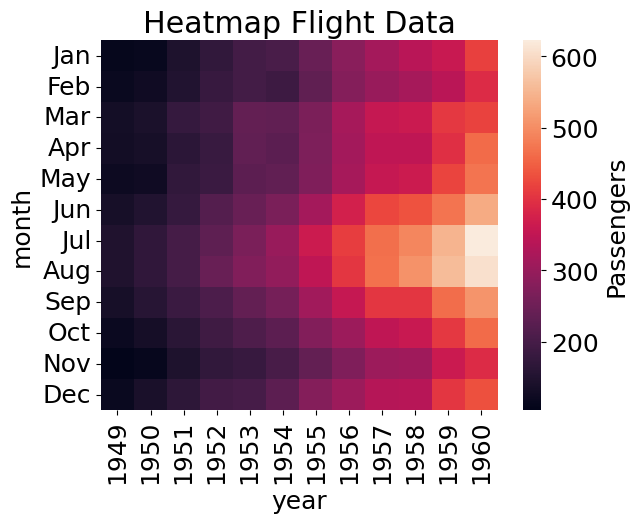

In [75]:
flights = flights.pivot(index="month", columns="year", values="passengers") # Creates a 2d grid to plot
ax = sns.heatmap(flights, cbar_kws={'label': 'Passengers'})
ax.set_title("Heatmap Flight Data")

## Surface Plots
Surface plots come up often enough in optimization settings that it's worth seeing how they work. 

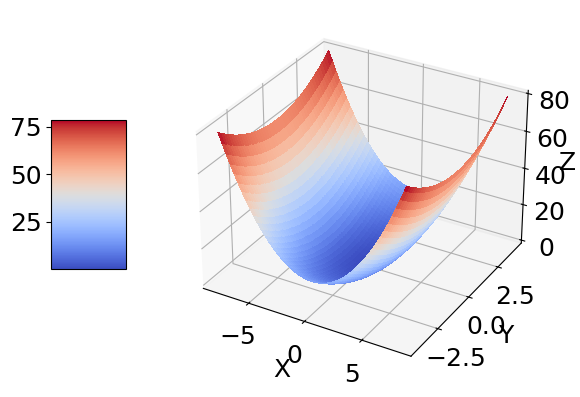

In [76]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = np.linspace(-8, 8, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)  # Turns 1d vectors x and y into 2d grids X and Y
Z = X**2 + Y**2  # Defines our values Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm",
                       linewidth=0, antialiased=False)

ax.set_zticks(np.arange(0, 90, 20))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.zaxis.labelpad=-2
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=2, location="left")

plt.show()

## Animations
Too many animations in a presentation can be distracting, but every once in a while they can be a really effective (and impressive) way to visualize your data. 

In [77]:
import matplotlib.animation as animation

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Same data as our surface plot above
x = np.linspace(-8, 8, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)  # Turns 1d vectors x and y into 2d grids X and Y
Z = X**2 + Y**2  # Defines our values Z = f(X,Y)

def init():
    ax.plot_surface(X, Y, Z, cmap="coolwarm",
                       linewidth=0, antialiased=False)
    ax.set_zticks(np.arange(0, 90, 20))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.zaxis.labelpad=-2
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('basic_animation.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.


## Geospatial Visualization
Unfortunately, we don't have time in this course to dig deep into geospatial data visualization. It can get very complicated very quickly, so I will simply recommend checking out the [plotly](https://plotly.com/python/maps/) graphing package if you are interested in visualizing geospatial data in Python. Here's an example showing the power of plotly:

In [ ]:
import plotly
from urllib.request import urlopen
import json
import pandas as pd
import plotly.express as px

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

fig = px.choropleth_map(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           map_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
plotly.offline.plot(fig, filename='unemployment_map.html')

# Breakout: Make a Nice Plot
We've now seen how to make lots of different types of plots using matplotlib and seaborn. In this breakout, you'll get a chance to practice these methods on a new dataset. Please do the following:
1. Load in a default dataset from seaborn using the [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) functionality.
2. Explore the dataset using the pandas methods we have learned about (e.g., `df.head()`, `df.info()`, etc.)
3. Make a plot of *something* in the dataset. It could be a scatter plot showing a correlation between two variables, or a time series showing some trend over time, or a heatmap showing how a trend evolves with two different variables.
4. Make the plot prettier by updating the plot params.
5. Share your plot with your neighbor and explain what your plot is showing. 